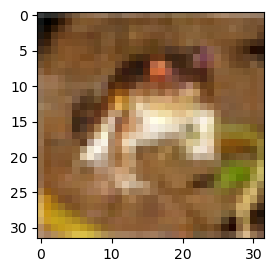

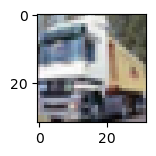

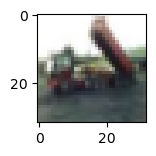

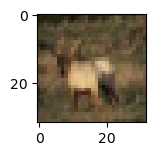

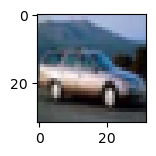

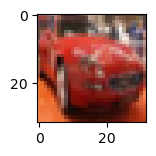

Epoch 1/10
1563/1563 [==============================] - 60s 36ms/step - loss: 1.5402 - accuracy: 0.4362
Epoch 2/10
1563/1563 [==============================] - 60s 38ms/step - loss: 1.1985 - accuracy: 0.5757
Epoch 3/10
1563/1563 [==============================] - 61s 39ms/step - loss: 1.0611 - accuracy: 0.6264
Epoch 4/10
1563/1563 [==============================] - 60s 38ms/step - loss: 0.9719 - accuracy: 0.6578
Epoch 5/10
1563/1563 [==============================] - 56s 36ms/step - loss: 0.8985 - accuracy: 0.6835
Epoch 6/10
1563/1563 [==============================] - 55s 35ms/step - loss: 0.8425 - accuracy: 0.7046
Epoch 7/10
1563/1563 [==============================] - 54s 35ms/step - loss: 0.7963 - accuracy: 0.7191
Epoch 8/10
1563/1563 [==============================] - 54s 35ms/step - loss: 0.7582 - accuracy: 0.7327
Epoch 9/10
1563/1563 [==============================] - 53s 34ms/step - loss: 0.7198 - accuracy: 0.7479
Epoch 10/10
1563/1563 [==============================] - 53s 34m

In [1]:
from keras.datasets import cifar10
import matplotlib.pyplot as plt
 
(train_X,train_Y),(test_X,test_Y)=cifar10.load_data()
n=6
plt.figure(figsize=(20,10))
for i in range(n):
    plt.subplot(330+1+i)
    plt.imshow(train_X[i])
    plt.show()

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load the data
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

# Scale the data
x_train = x_train / 255.0
x_test = x_test / 255.0

train_Y=np_utils.to_categorical(train_Y)
test_Y=np_utils.to_categorical(test_Y)
 
num_classes=test_Y.shape[1]

# Build the model
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])



# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=10, )

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print('Test accuracy:', test_acc)

model.summary()

model.save("model1_cifar_10epoch.h5")
